In [4]:
import numpy as np
print(np.ones((1, 2)))
print(np.zeros((1, 2)))
print(np.random.rand(3, 2))

[[1. 1.]]
[[0. 0.]]
[[0.82400955 0.77677261]
 [0.34202328 0.97039057]
 [0.91747388 0.13976816]]


In [8]:
np.random.rand(1, 2)

array([[[0.33506225, 0.04789221]]])

In [1]:
from scipy.stats import multivariate_normal
import numpy as np
from scipy.signal import fftconvolve
from skimage import restoration

std = 3.0
f = np.vectorize(lambda x, y: multivariate_normal([0.0, 0.0], np.diag([std]*2)).pdf([x, y]))
X, Y = np.meshgrid(np.arange(-2, 3, 1, dtype=np.float32), np.arange(-2, 3, 1, dtype=np.float32))
kernel1 = f(X, Y)
kernel1 = kernel1 / kernel1.sum()
gauss_filt = kernel1

np.random.seed(0)
kernel2 = np.random.rand(*kernel1.shape)
kernel2 = kernel2 / kernel2.sum()
random_filt = kernel2

kernel3 = np.ones_like(kernel1)
kernel3 = kernel3 / kernel3.sum()
smooth_filt = kernel3

filt = []
filt.append(lambda x: x)
filt.append(lambda x: np.maximum(0, fftconvolve(x, kernel1, mode='same')))
filt.append(lambda x: np.maximum(0, fftconvolve(x, kernel2, mode='same')))
filt.append(lambda x: np.maximum(0, restoration.wiener(x, kernel1, 1e-2)))
filt.append(lambda x: np.maximum(0, restoration.wiener(x, kernel2, 1e-2)))

In [2]:
from matplotlib import pyplot as plt
from torchvision import datasets

data = datasets.MNIST(root='./data', train=False, download=True)
img = data.data[0].numpy() / 255

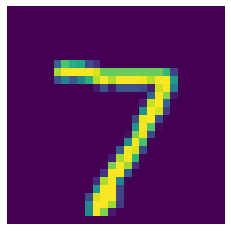

In [3]:
plt.imshow(img)
plt.axis('off')
plt.show()

(-0.5, 4.5, 4.5, -0.5)

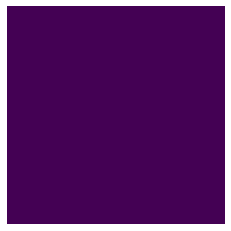

In [6]:
plt.imshow(kernel3)
plt.axis('off')

(-0.5, 4.5, 4.5, -0.5)

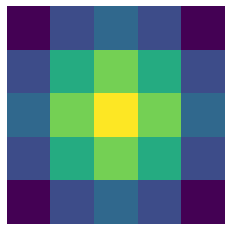

In [7]:
plt.imshow(kernel1)
plt.axis('off')